In [33]:
import os

from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
load_dotenv()  # take environment variables from .env.
my_path = os.getenv('MY_PATH')

'/home/konsternacja/Git/fluorcam-python'

In [14]:
measurement1 = pd.read_csv(my_path + '/data/concatenated_file1.tsv', sep='\t')
measurement2 = pd.read_csv(my_path + '/data/concatenated_file2.tsv', sep='\t')
measurement3 = pd.read_csv(my_path + '/data/concatenated_file3.tsv', sep='\t')

In [16]:
measurement1['measurement'] = 1
measurement2['measurement'] = 2
measurement3['measurement'] = 3

In [20]:
merged = pd.concat([measurement1, measurement2, measurement3])
merged.head(10)

,Size [pixels],Fo,Fo_gauss,Fo_median,Fm,Fv,Fp,Fp-median,Fp-gauss,Fp-average,...,qL_D2,qL_D3,Rfd_L1,Rfd_L2,Rfd_L3,Rfd_L4,Rfd_Lss,plant,inoculation,measurement
0,1498.0,91.65,91.65,76.13,706.80,615.15,736.96,681.57,885.58,793.76,...,1.20,1.20,0.20,0.77,1.20,1.55,1.85,AT5G45470,E-,1
1,640.0,61.32,61.32,48.81,504.31,442.99,543.51,492.86,684.70,595.06,...,1.24,1.24,0.26,0.68,1.04,1.34,1.55,AT5G45470,E-,1
2,664.0,58.08,58.08,44.87,491.79,433.71,508.32,463.38,628.65,553.86,...,1.22,1.23,0.21,0.48,0.93,1.41,1.78,AT5G45470,E-,1
3,213.0,42.74,42.74,29.73,389.82,347.08,394.73,351.91,521.73,442.98,...,1.22,1.22,0.22,0.76,1.28,1.70,2.36,AT5G45470,E-,1
4,265.0,52.19,52.19,39.52,437.20,385.02,460.44,406.58,603.26,514.71,...,1.30,1.22,0.25,0.89,1.27,1.72,2.17,AT5G45470,E-,1
5,1232.0,92.34,92.34,76.99,708.50,616.16,736.80,678.68,883.62,792.11,...,1.19,1.18,0.21,0.83,1.23,1.62,1.85,AT5G45470,E-,1
6,726.0,88.70,88.70,72.13,678.21,589.51,708.58,647.00,863.44,768.74,...,1.17,1.19,0.22,0.84,1.26,1.70,2.08,AT5G45470,E-,1
7,946.0,69.35,69.35,55.76,568.03,498.67,599.17,544.63,744.96,655.29,...,1.23,1.22,0.22,0.78,1.25,1.59,1.79,AT5G45470,E-,1
8,431.0,49.17,49.17,36.79,426.97,377.80,443.61,395.02,575.89,492.89,...,1.24,1.25,0.30,0.83,1.38,1.54,1.70,AT5G45470,E-,1
9,664.0,53.22,53.22,40.62,459.06,405.84,488.28,438.57,626.35,539.33,...,1.28,1.25,0.30,0.92,1.29,1.66,2.01,AT5G45470,E-,1


In [22]:
grouped = merged.groupby(['plant', 'inoculation', 'measurement'])

mean_values = grouped.mean()
mean_values.head(10)

Size [pixels]         Fo   Fo_gauss  \
plant     inoculation measurement                                        
AT5G45470 E+          1               855.508772  70.413860  70.413860   
                      2              1469.600000  69.389455  69.389455   
                      3              1792.933333  79.845200  79.845200   
          E-          1               816.977273  67.229318  67.229318   
                      2              1467.573529  69.589559  69.589559   
                      3              1320.069307  79.181386  79.181386   
WT        E+          1               879.069767  64.865814  64.865814   
                      2              1421.882353  63.942745  63.942745   
                      3              1386.176471  71.753529  71.753529   
          E-          1               934.500000  69.614750  69.614750   

                                   Fo_median          Fm          Fv  \
plant     inoculation measurement                                      
AT5G45470 E+          1            54.835789  539.769123  469.356140   
                      2            54.382000  545.675818  476.285455   
                      3            66.435200  643.010267  563.164933   
          E-          1            52.733864  535.845227  468.615455   
                      2            54.788971  553.926324  484.336176   
                      3            65.881485  619.930396  540.748713   
WT        E+          1            50.152791  516.620000  451.753488   
                      2            49.563922  517.844118  453.900980   
                      3            58.291765  571.315588  499.562206   
          E-          1            53.998250  531.741000  462.126000   

                                           Fp   Fp-median    Fp-gauss  \
plant     inoculation measurement                                       
AT5G45470 E+          1            569.029474  510.277719  709.054211   
                      2            569.278364  510.920364  707.784182   
                      3            671.195467  618.881333  810.308400   
          E-          1            564.987045  509.220682  706.021818   
                      2            579.216912  521.026176  718.326912   
                      3            648.608911  596.882277  786.636337   
WT        E+          1            543.732791  487.656977  680.600233   
                      2            540.778235  484.207843  676.805294   
                      3            600.028824  547.664559  736.912353   
          E-          1            560.843500  501.547000  700.825750   

                                   Fp-average  ...     qL_L4      qL_Lss  \
plant     inoculation measurement              ...                         
AT5G45470 E+          1            624.449298  ... -0.541228   -0.531228   
                      2            622.932364  ... -0.528545   -0.547273   
                      3            720.467467  ... -0.024533    0.011600   
          E-          1            619.257500  ... -0.525682   -0.565227   
                      2            632.418382  ... -0.603382   -0.331176   
                      3            697.505545  ... -0.074257   -0.023960   
WT        E+          1            596.871860  ... -0.575581 -698.011860   
                      2            593.090784  ... -0.572941   -2.314706   
                      3            649.632206  ... -0.265882   -0.251471   
          E-          1            615.429500  ... -2.189250   -0.904250   

                                      qL_D1     qL_D2     qL_D3    Rfd_L1  \
plant     inoculation measurement                                           
AT5G45470 E+          1            1.191053  1.200175  1.180702  0.230526   
                      2            1.164545  1.203818  1.197273  0.267273   
                      3            1.186267  1.211867  1.208800  0.221733   
          E-          1            1.203182  1.216364  1.203409  0.236136   
                      2      

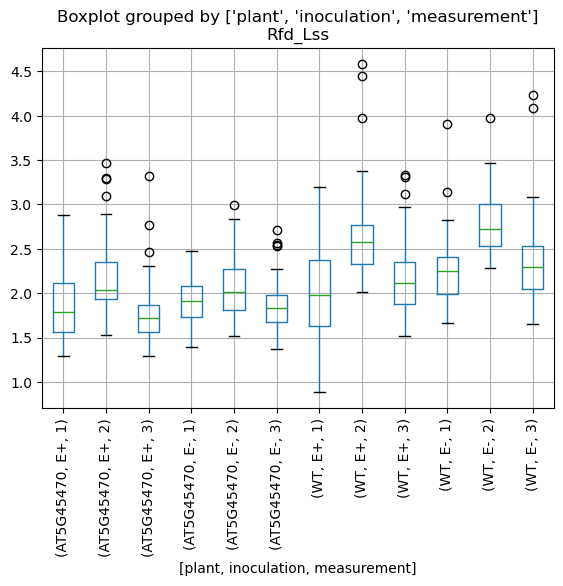

In [29]:
merged_sorted = merged.sort_values(by=['plant', 'inoculation', 'measurement'])

merged_sorted.boxplot(column='Rfd_Lss', by=['plant', 'inoculation', 'measurement'])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
# Fit the model
model = ols('Rfd_Lss ~ C(plant) + C(inoculation) + C(measurement) + C(plant):C(inoculation) + C(plant):C(measurement) + C(inoculation):C(measurement) + C(inoculation):C(measurement):C(plant)', data=merged_sorted).fit()

# Perform the ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                            sum_sq     df           F  \
C(plant)                                 37.198050    1.0  252.083288   
C(inoculation)                            1.409080    1.0    9.549038   
C(measurement)                           22.955785    2.0   77.783239   
C(plant):C(inoculation)                   1.159686    1.0    7.858945   
C(plant):C(measurement)                   2.702009    2.0    9.155471   
C(inoculation):C(measurement)             0.614846    2.0    2.083341   
C(inoculation):C(measurement):C(plant)    0.104325    2.0    0.353494   
Residual                                105.654778  716.0         NaN   

                                              PR(>F)  
C(plant)                                7.360750e-49  
C(inoculation)                          2.078023e-03  
C(measurement)                          2.699457e-31  
C(plant):C(inoculation)                 5.193847e-03  
C(plant):C(measurement)                 1.185284e-04  
C(inoculatio